## Qommunity solvers testing for sample graphs

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

### The graphs in question and their ground truth partitioning

In [2]:
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (0, 2), (3, 4), (4, 5), (5, 3), (5, 0)])
c1 = [0, 1, 2]
c2 = [3, 4, 5]
c = c1 + c2
A_ij = nx.to_numpy_array(G, nodelist=c)

# "Ground truth" for G0
c_0 = [c1, c2]

In [3]:
A_ij_bis = np.zeros((12, 12))
A_ij_bis[:6, :6] = A_ij
A_ij_bis[6:12, 6:12] = A_ij
A_ij_bis[6, 5] = 1
A_ij_bis[0, -1] = 1

c1 = [0, 1, 2]
c2 = [3, 4, 5]
c3 = [6, 7, 8]
c4 = [9, 10, 11]
c = c1 + c2 + c3 + c4
G_bis = nx.from_numpy_array(A_ij_bis)

# "Ground truth" for G_bis
c_bis = [c1, c2, c3, c4]

In [4]:
A_ij_bis_bis = np.zeros((12, 12))
A_ij_bis_bis[:6, :6] = A_ij
A_ij_bis_bis[6:12, 6:12] = A_ij
A_ij_bis_bis[6, 5] = 1
A_ij_bis_bis[5, 6] = 1
A_ij_bis_bis[0, -1] = 1
A_ij_bis_bis[-1, 0] = 1

# Extra edge
A_ij_bis_bis[0, 3] = 1
A_ij_bis_bis[3, 0] = 1

c1 = [0, 1, 2]
c2 = [3, 4, 5]
c3 = [6, 7, 8]
c4 = [9, 10, 11]
c = c1 + c2 + c3 + c4
G_bis_bis = nx.from_numpy_array(A_ij_bis_bis)

# "Ground truth" for G_bis
c_bis_bis = [c1, c2, c3, c4]

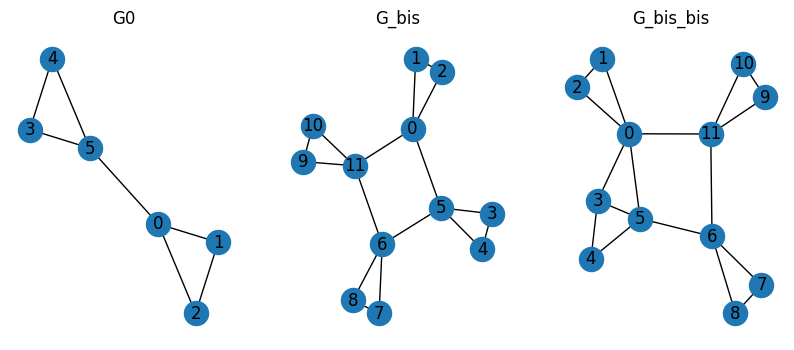

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
nx.draw(G, with_labels=True, ax=ax[0])
nx.draw(G_bis, with_labels=True, ax=ax[1])
nx.draw(G_bis_bis, with_labels=True, ax=ax[2])
ax[0].set_title("G0")
ax[1].set_title("G_bis")
ax[2].set_title("G_bis_bis");

#### Results for G0

In [6]:
from Qommunity.samplers.regular.dqm_sampler import DQMSampler
from Qommunity.samplers.regular.louvain_sampler import LouvainSampler
from Qommunity.searchers.community_searcher import CommunitySearcher
from Qommunity.samplers.regular.bayan_sampler import BayanSampler
from Qommunity.samplers.regular.leiden_sampler import LeidenSampler


bayan = BayanSampler(G)
leiden = LeidenSampler(G)
dqm = DQMSampler(G, 5, cases=len(c_0))
louvain = LouvainSampler(G, resolution=1)

bayan_searcher = CommunitySearcher(bayan)
leiden_searcher = CommunitySearcher(leiden)
dqm_searcher = CommunitySearcher(dqm)
louvain_searcher = CommunitySearcher(louvain)

In [9]:
bayan_results = bayan_searcher.community_search();
bayan_results

[[0, 1, 2], [3, 4, 5]]

In [10]:
leiden_results = leiden_searcher.community_search()
leiden_results

[[0, 1, 2], [3, 4, 5]]

In [11]:
dqm_results = dqm_searcher.community_search()
dqm_results

C:\Users\basia\Desktop\Praca_Inzynierska_2024\QHyper\QHyper\converter.py:193: ProblemWarning: Defined problem has constraints. DQM does not support constraints, it only supports objective functions!
  warnings.warn(


[[3, 4, 5], [0, 1, 2]]

In [12]:
louvain_results = louvain_searcher.community_search()
louvain_results

[[0, 1, 2], [3, 4, 5]]

In [13]:
from samplers.hierarchical.advantage_sampler import AdvantageSampler
from searchers.hierarchical_community_searcher import HierarchicalCommunitySearcher

advantage = AdvantageSampler(G)
searcher = HierarchicalCommunitySearcher(advantage)
advantage_results = searcher.hierarchical_community_search()
advantage_results

[[0, 1, 2], [3, 4, 5]]

#### Results for G_bis

In [14]:
bayan = BayanSampler(G_bis)
leiden = LeidenSampler(G_bis)
dqm = DQMSampler(G_bis, 5, cases=len(c_bis))
louvain = LouvainSampler(G_bis, resolution=1)

bayan_searcher = CommunitySearcher(bayan)
leiden_searcher = CommunitySearcher(leiden)
dqm_searcher = CommunitySearcher(dqm)
louvain_searcher = CommunitySearcher(louvain)

In [15]:
bayan_results = bayan_searcher.community_search();
bayan_results

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

In [16]:
leiden_results = leiden_searcher.community_search()
leiden_results

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

In [17]:
dqm_results = dqm_searcher.community_search()
dqm_results

[[3, 4, 5], [6, 7, 8], [9, 10, 11], [0, 1, 2]]

In [18]:
louvain_results = louvain_searcher.community_search()
louvain_results

[[0, 1, 2], [3, 4, 5], [8, 6, 7], [9, 10, 11]]

In [19]:
advantage = AdvantageSampler(G_bis)
searcher = HierarchicalCommunitySearcher(advantage)
advantage_results = searcher.hierarchical_community_search()
advantage_results

[[6, 7, 8], [9, 10, 11], [3, 4, 5], [0, 1, 2]]

#### Results for G_bis_bis

In [20]:
bayan = BayanSampler(G_bis_bis)
leiden = LeidenSampler(G_bis_bis)
dqm = DQMSampler(G_bis_bis, 5, cases=len(c_bis_bis))
louvain = LouvainSampler(G_bis_bis, 1)

bayan_searcher = CommunitySearcher(bayan)
leiden_searcher = CommunitySearcher(leiden)
dqm_searcher = CommunitySearcher(dqm)
louvain_searcher = CommunitySearcher(louvain)

In [22]:
bayan_results = bayan_searcher.community_search();
bayan_results

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

In [23]:
leiden_results = leiden_searcher.community_search()
leiden_results

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

In [24]:
dqm_results = dqm_searcher.community_search()
dqm_results

C:\Users\basia\Desktop\Praca_Inzynierska_2024\QHyper\QHyper\converter.py:193: ProblemWarning: Defined problem has constraints. DQM does not support constraints, it only supports objective functions!
  warnings.warn(


[[6, 7, 8], [3, 4, 5], [9, 10, 11], [0, 1, 2]]

In [25]:
louvain_results = louvain_searcher.community_search()
louvain_results

[[0, 1, 2], [3, 4, 5], [8, 6, 7], [9, 10, 11]]

In [26]:
advantage = AdvantageSampler(G_bis_bis)
searcher = HierarchicalCommunitySearcher(advantage)
advantage_results = searcher.hierarchical_community_search()
advantage_results

[[3, 4, 5], [0, 1, 2], [9, 10, 11], [6, 7, 8]]

##### As observed, all the solvers returned the same community search partitioning results for the simple graphs examples.